# Face Mask Segmentation: Traditional Techniques and U-Net

This notebook implements the segmentation tasks for the Face Mask Detection, Classification, and Segmentation project. It includes:

- **Task c: Region Segmentation Using Traditional Techniques** (thresholding)
- **Task d: Mask Segmentation Using U-Net** (deep learning with IoU evaluation)

The code is divided into three main sections:
1. Preprocessing: Converts images to grayscale and resizes them to 64x64.
2. Traditional Segmentation: Applies thresholding to segment mask regions.
3. U-Net Segmentation: Trains a U-Net model for precise mask segmentation and compares it with traditional segmentation using IoU scores.
4. Evaluation and Comparison between Traditional and Unet

## Prerequisites
- Ensure the `mask` and `s_mask` folders from the MFSD dataset (https://github.com/sadjadrz/MFSD) are in the same directory as this notebook.
- Required libraries: `os`, `cv2`, `numpy`, `tensorflow`, `matplotlib`.

### Preprocessing

The code preprocesses face mask images by converting them to grayscale, resizing them to 64×64, and saving them in designated folders. It also processes corresponding ground truth masks and displays every 500th image for verification.

Displaying Image 500: 000343_1.jpg


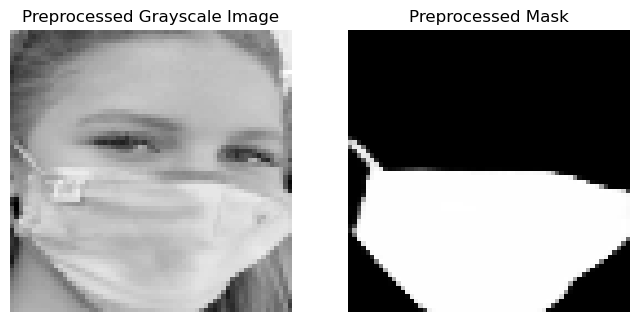

Displaying Image 1000: 000792_2.jpg


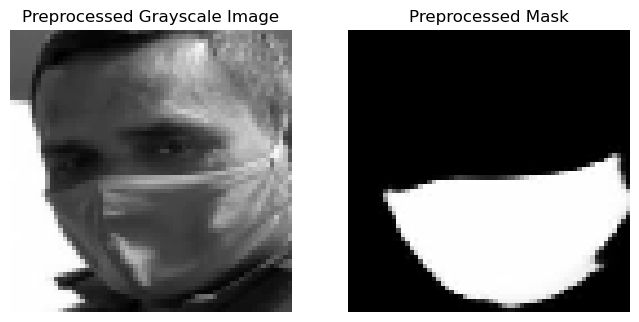

Displaying Image 1500: 001216_5.jpg


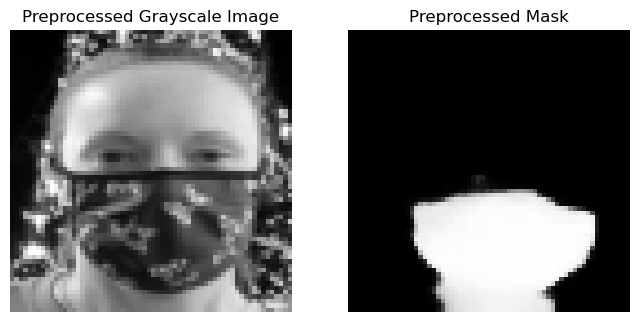

Displaying Image 2000: 001577_1.jpg


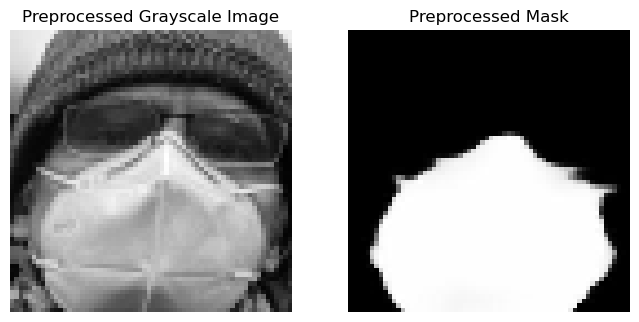

Displaying Image 2500: 002014_3.jpg


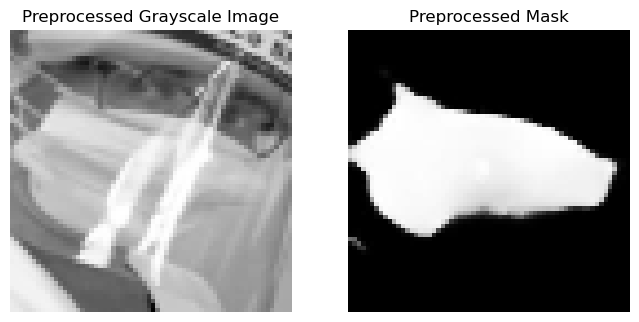

Displaying Image 3000: 002486_1.jpg


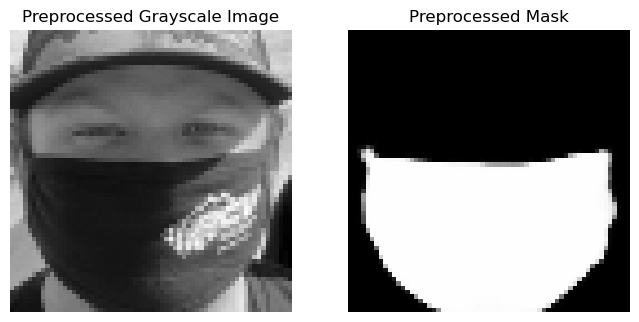

Displaying Image 3500: 002963_1.jpg


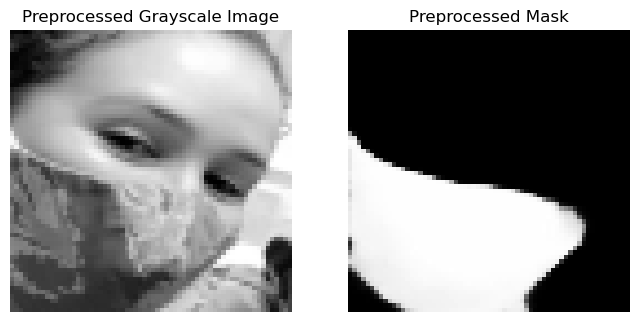

Displaying Image 4000: 003434_1.jpg


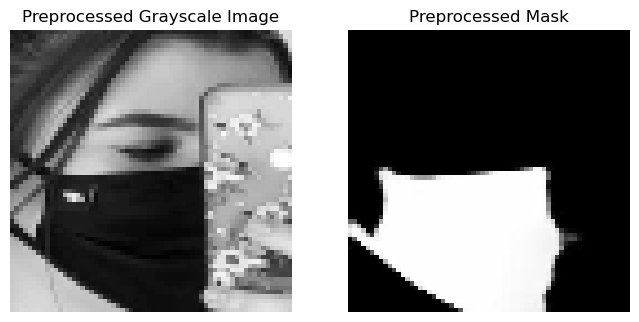

Displaying Image 4500: 003922_1.jpg


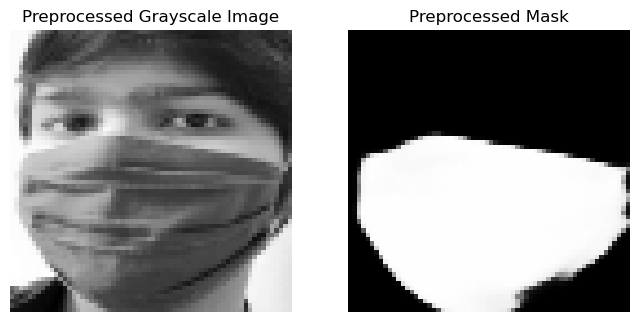

Displaying Image 5000: 004420_1.jpg


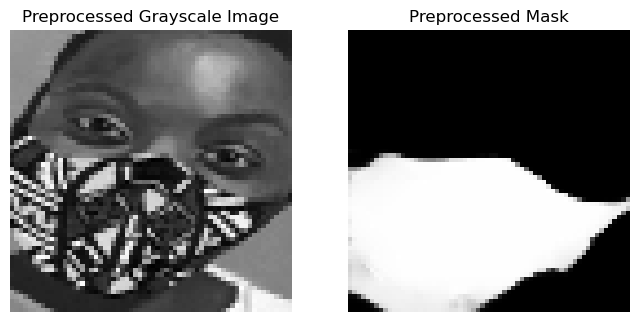

Displaying Image 5500: 004883_1.jpg


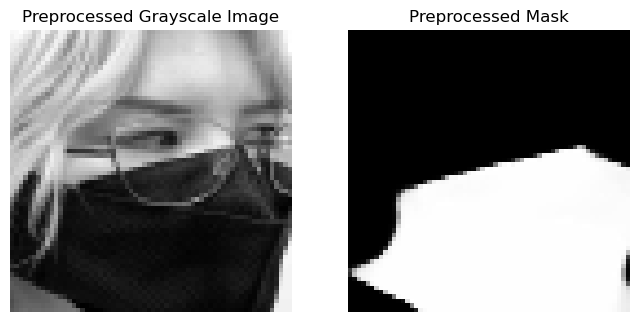

Displaying Image 6000: 005407_2.jpg


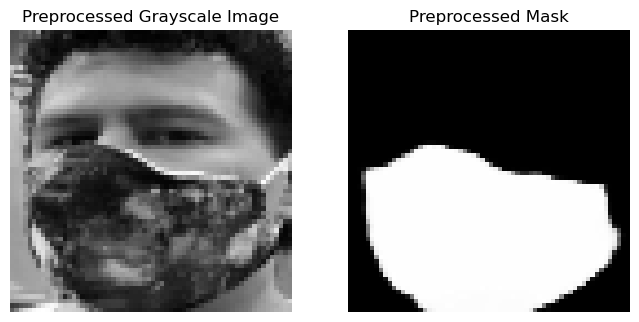

Displaying Image 6500: 005879_1.jpg


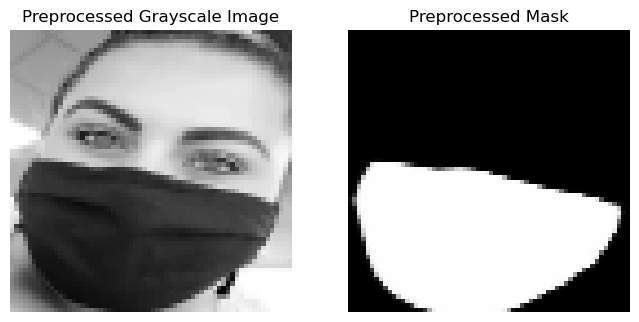

Displaying Image 7000: 006335_1.jpg


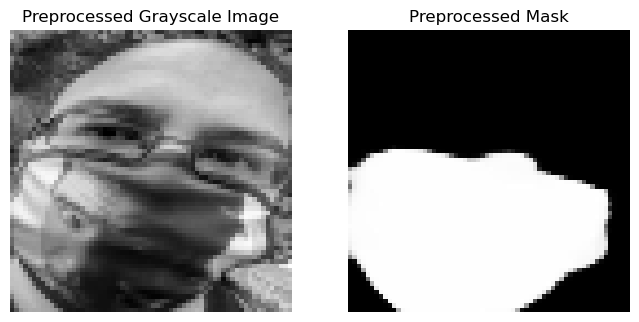

Displaying Image 7500: 006723_1.jpg


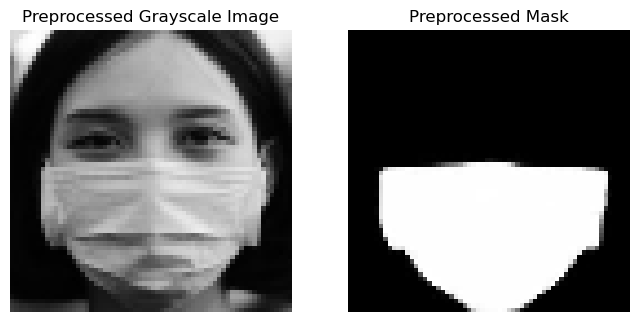

Displaying Image 8000: 007136_1.jpg


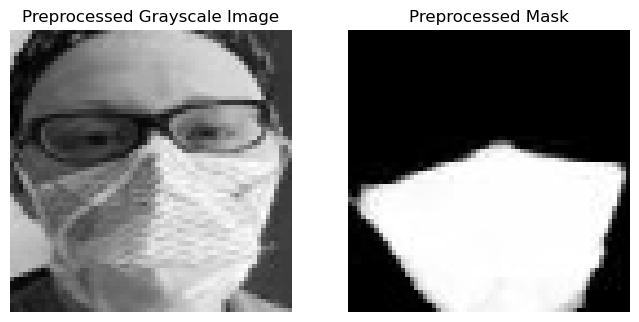

Displaying Image 8500: 007492_1.jpg


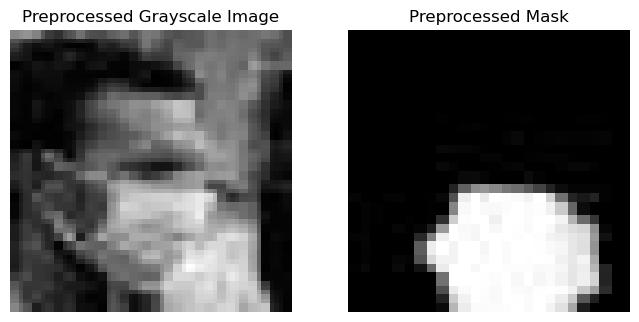

Displaying Image 9000: 007849_1.jpg


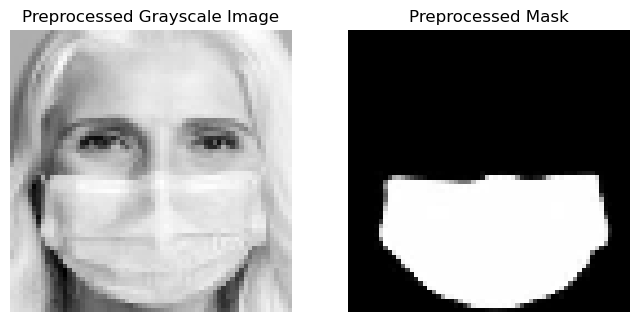

✅ Preprocessing complete. Processed 9382 images.


In [1]:
# Code Block 1: Preprocessing
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the current directory
current_dir = os.getcwd()

# Define subfolder paths
original_dir = os.path.join(current_dir, "mask")  # Folder for original masked images
masked_dir = os.path.join(current_dir, "s_mask")  # Folder for binary ground truth masks
preprocessed_original_images = os.path.join(current_dir, "P_mask")  # Folder for preprocessed grayscale masked images
preprocessed_ground_truth_masks = os.path.join(current_dir, "P_s_mask")  # Folder for preprocessed ground truth masks

# Create output directories if they don't exist
os.makedirs(preprocessed_original_images, exist_ok=True)
os.makedirs(preprocessed_ground_truth_masks, exist_ok=True)

# Target shape for resizing
target_shape = (64, 64)

def preprocess_images():
    print ("preprocessing started")
    processed_count = 0
    for idx, filename in enumerate(os.listdir(original_dir), start=1):  # Start index from 1
        if filename.endswith((".jpg", ".png")):
            original_path = os.path.join(original_dir, filename)
            mask_path = os.path.join(masked_dir, filename)

            # Read original image
            original_img = cv2.imread(original_path)
            if original_img is None:
                print(f"Failed to load: {filename}")
                continue

            # Convert to grayscale and resize
            gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
            resized_gray = cv2.resize(gray_img, target_shape, interpolation=cv2.INTER_AREA)
            cv2.imwrite(os.path.join(preprocessed_original_images, f"gray_{filename}"), resized_gray)

            # Process mask if available
            if os.path.exists(mask_path):
                mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                resized_mask = cv2.resize(mask_img, target_shape, interpolation=cv2.INTER_NEAREST)
                cv2.imwrite(os.path.join(preprocessed_ground_truth_masks, f"mask_{filename}"), resized_mask)
                processed_count += 1

            # Display one image out of every 500
            if idx % 500 == 0:
                print(f"Displaying Image {idx}: {filename}")
                plt.figure(figsize=(8, 4))
                plt.subplot(1, 2, 1)
                plt.imshow(resized_gray, cmap='gray')
                plt.title("Preprocessed Grayscale Image")
                plt.axis("off")

                plt.subplot(1, 2, 2)
                plt.imshow(resized_mask, cmap='gray')
                plt.title("Preprocessed Mask")
                plt.axis("off")

                plt.show()

    print(f"✅ Preprocessing complete. Processed {processed_count} images.")

# Run the preprocessing function
preprocess_images()


### Tradional Segmentaion 

The code performs traditional segmentation using Otsu’s thresholding on grayscale images, saves the segmented results, and displays every 500th image for verification

Traditional segmentation started
Displaying Image 500: gray_000343_1.jpg


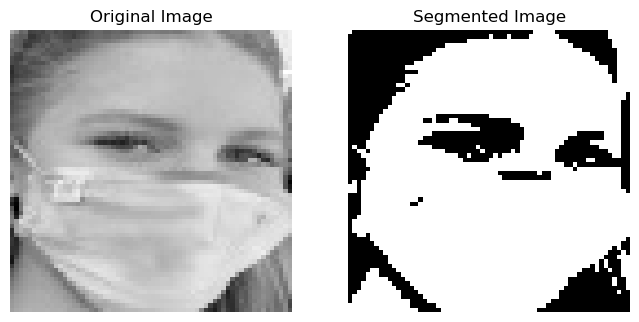

Displaying Image 1000: gray_000792_2.jpg


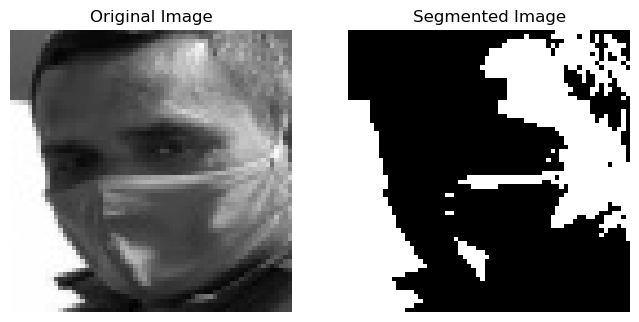

Displaying Image 1500: gray_001216_5.jpg


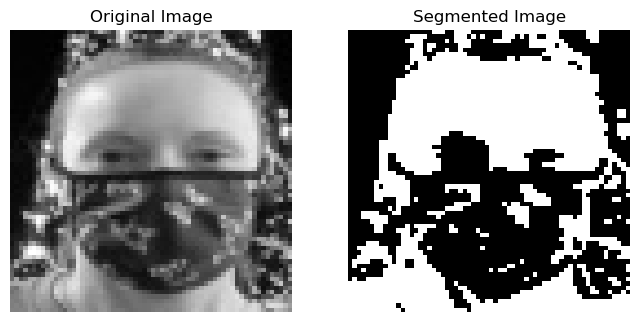

Displaying Image 2000: gray_001577_1.jpg


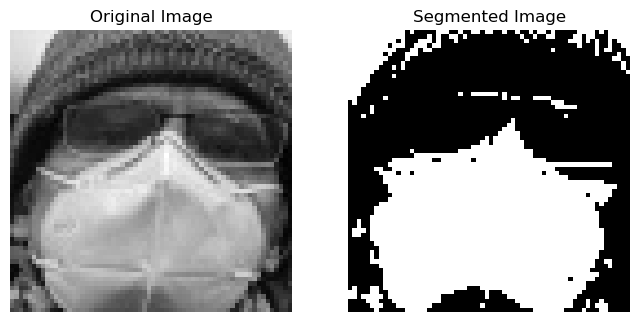

Displaying Image 2500: gray_002014_3.jpg


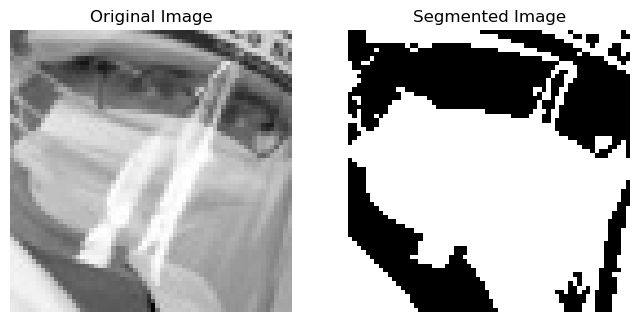

Displaying Image 3000: gray_002486_1.jpg


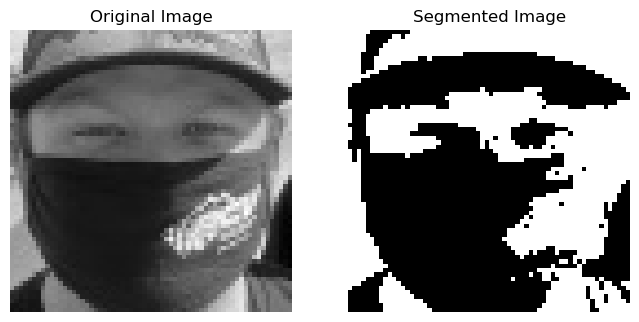

Displaying Image 3500: gray_002963_1.jpg


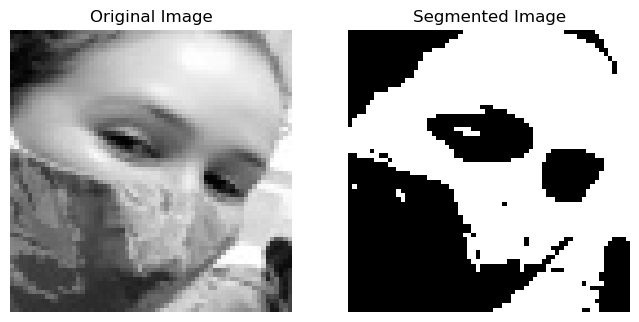

Displaying Image 4000: gray_003434_1.jpg


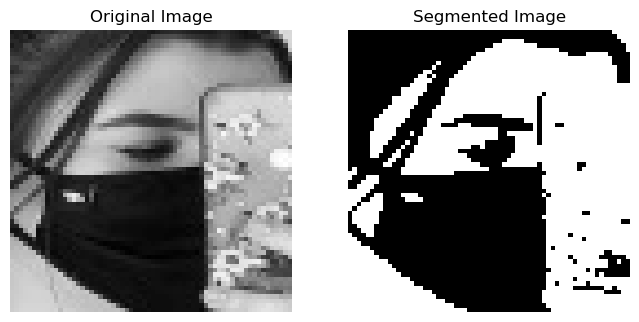

Displaying Image 4500: gray_003922_1.jpg


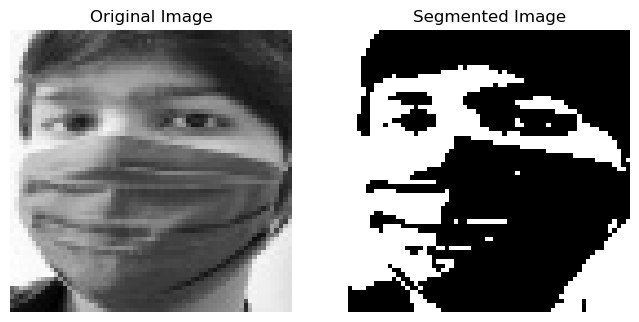

Displaying Image 5000: gray_004420_1.jpg


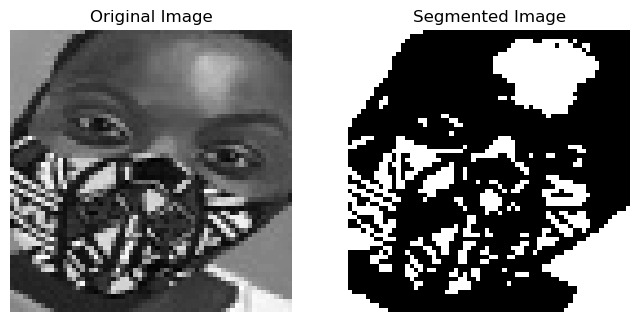

Displaying Image 5500: gray_004883_1.jpg


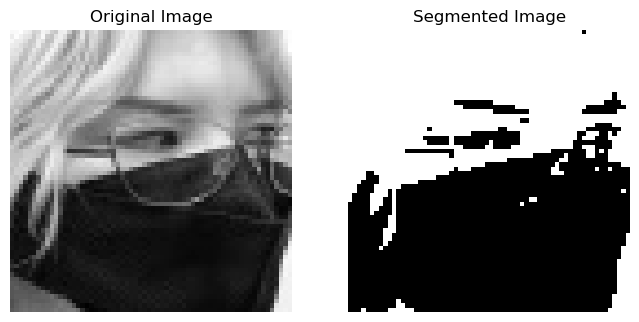

Displaying Image 6000: gray_005407_2.jpg


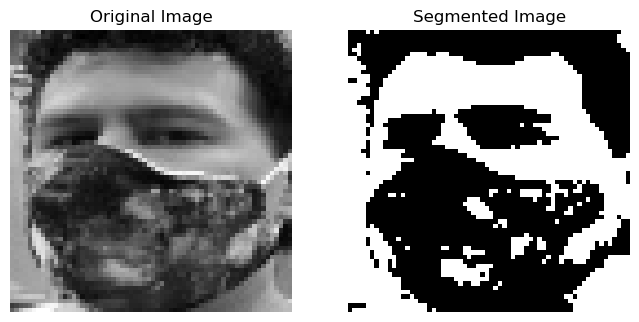

Displaying Image 6500: gray_005879_1.jpg


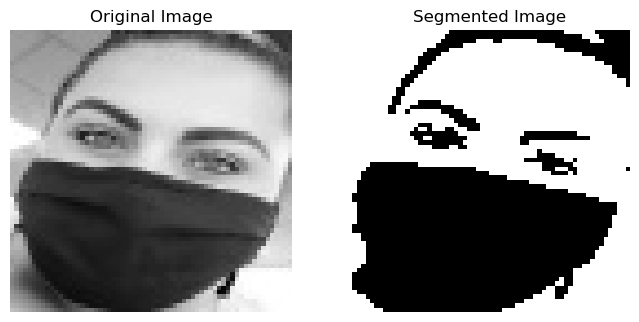

Displaying Image 7000: gray_006335_1.jpg


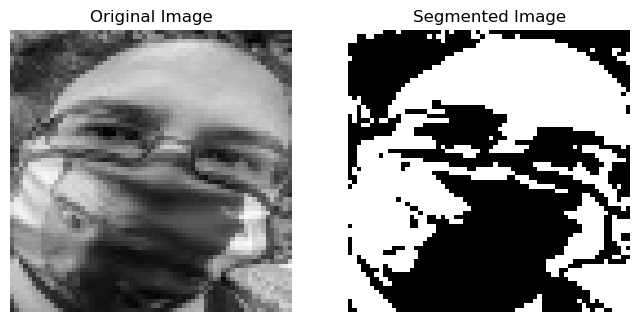

Displaying Image 7500: gray_006723_1.jpg


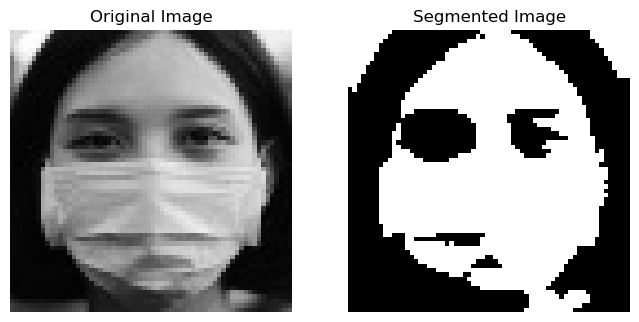

Displaying Image 8000: gray_007136_1.jpg


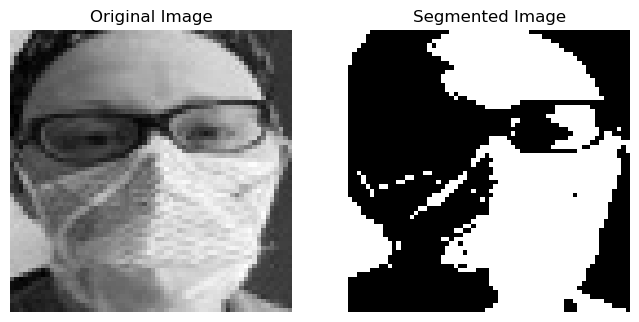

Displaying Image 8500: gray_007492_1.jpg


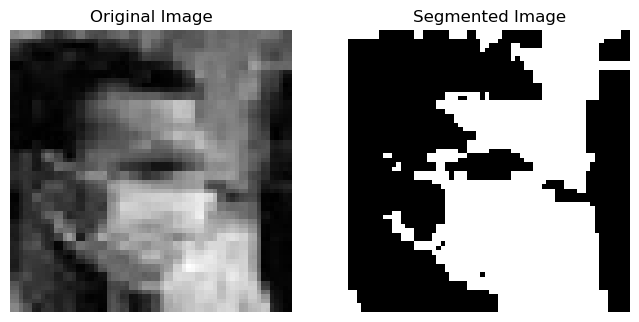

Displaying Image 9000: gray_007849_1.jpg


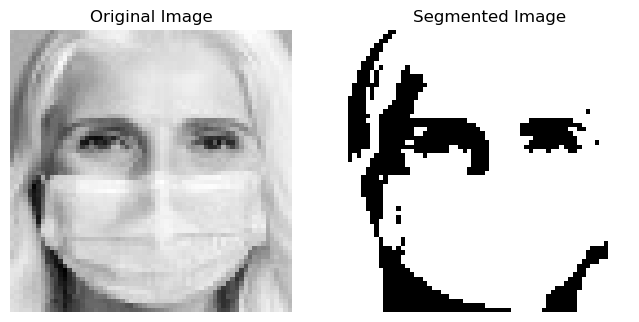

✅ Traditional segmentation complete. Processed 9383 images.
✅ Traditional segmentation complete. Segmented images saved in C:\Users\Naval Kishore\Desktop\vr_mini\Task_3_and_4\Traditional_Segmented


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def traditional_segmentation(input_dir, output_dir):
    print("Traditional segmentation started")
    os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists
    processed_count = 0  # Counter to track number of processed images
    
    for idx, filename in enumerate(os.listdir(input_dir), start=1):  # Start index from 1
        if filename.endswith((".jpg", ".png")):
            img_path = os.path.join(input_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Apply Otsu's thresholding for segmentation
            _, thresholded_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Save segmented image
            output_path = os.path.join(output_dir, f"seg_{filename}")
            cv2.imwrite(output_path, thresholded_img)
            processed_count += 1

            # Display one out of every 500 segmented images
            if idx % 500 == 0:
                print(f"Displaying Image {idx}: {filename}")
                plt.figure(figsize=(8, 4))
                
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title("Original Image")
                plt.axis("off")

                plt.subplot(1, 2, 2)
                plt.imshow(thresholded_img, cmap='gray')
                plt.title("Segmented Image")
                plt.axis("off")

                plt.show()

    print(f"✅ Traditional segmentation complete. Processed {processed_count} images.")

# Define output directory for segmented images
segmented_output_dir = os.path.join(current_dir, "Traditional_Segmented")

# Run Traditional Segmentation
traditional_segmentation(preprocessed_original_images, segmented_output_dir)

print(f"✅ Traditional segmentation complete. Segmented images saved in {segmented_output_dir}")


### Unet 


The code loads preprocessed grayscale images and their corresponding masks, normalizes them to a [0,1] range, and stores them as NumPy arrays for training. If no valid image-mask pairs are found, it prints an error message

In [3]:
# Get the current directory
current_dir = os.getcwd()

# Define subfolder paths
original_dir = os.path.join(current_dir, "mask")  # Folder for original masked images
masked_dir = os.path.join(current_dir, "s_mask")  # Folder for binary ground truth masks
preprocessed_original_images = os.path.join(current_dir, "P_mask")  # Folder for preprocessed grayscale masked images
preprocessed_ground_truth_masks = os.path.join(current_dir, "P_s_mask")  # Folder for preprocessed ground truth masks
segmented_output_dir = os.path.join(current_dir, "Traditional_Segmented")
def load_data():
    images, masks = [], []
    for filename in os.listdir(preprocessed_original_images):
        if filename.startswith("gray_") and filename.endswith((".jpg", ".png")):
            img_path = os.path.join(preprocessed_original_images, filename)
            mask_path = os.path.join(preprocessed_ground_truth_masks, filename.replace("gray_", "mask_"))

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) if os.path.exists(mask_path) else None

            if img is not None and mask is not None:
                img = np.expand_dims(img / 255.0, axis=-1)  # Normalize
                mask = np.expand_dims(mask / 255.0, axis=-1)  # Normalize
                images.append(img)
                masks.append(mask)

    if len(images) == 0:
        print("❌ No valid image pairs found for training!")
        return None, None
        
    print(f"✅ Loaded {len(images)} image pairs for training.")
    return np.array(images), np.array(masks)

The code builds a **U-Net model** for **mask segmentation**.  

- **Encoder**: Pulls out important details from the image using convolution layers with **ReLU activation** and shrinks it down using **max pooling**.  
- **Decoder**: Brings the image back to its original size using **transposed convolutions** and keeps important details by linking back to earlier layers (**skip connections**).  
- **Output Layer**: Uses **sigmoid activation** to predict the mask, deciding which areas belong and which don’t.  
- **Compilation**: Runs on **Adam optimizer** and uses **binary cross-entropy loss** to improve accuracy in segmentation.
  

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def unet_model(input_shape=(64, 64, 1)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)
    
    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


The code trains the U-Net model for mask segmentation using the loaded dataset. It:

Trains with early stopping to prevent overfitting.

Logs loss and accuracy over epochs, displaying training progress.

Saves the trained model as "unet_model.h5"

In [5]:
import matplotlib.pyplot as plt

def train_and_predict(batch_size=16, epochs=5, validation_split=0.2):
    print("Unet model training  started")
    images, masks = load_data()
    if images is None:
        return

    model = unet_model()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    print(f"Starting training with {len(images)} images, batch size {batch_size}")
    history = model.fit(images, masks, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=[early_stopping])

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Save model
    model.save(os.path.join(current_dir, "unet_model.h5"))
    print(f"✅ Model saved to {os.path.join(current_dir, 'unet_model.h5')}")

This code takes user input for epochs and batch size, then trains the U-Net model using the specified values while keeping the validation split fixed at 20%.

Enter a epoch:  10
Enter a batch size:  64


Unet model training  started
✅ Loaded 9382 image pairs for training.
Starting training with 9382 images, batch size 64
Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.5362 - loss: 0.5934 - val_accuracy: 0.5640 - val_loss: 0.3996
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.5495 - loss: 0.3555 - val_accuracy: 0.6178 - val_loss: 0.2463
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.5865 - loss: 0.2214 - val_accuracy: 0.6184 - val_loss: 0.2189
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.5951 - loss: 0.1762 - val_accuracy: 0.6284 - val_loss: 0.1820
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 436s 3s/step - accuracy: 0.6001 - loss: 0.1487 - val_accuracy: 0.6348 - val_loss: 0.1793
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.6016 - loss: 0.1405 - val_accuracy: 0.6344 - val_loss: 0.1592
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.6044 - loss: 0.1278 - val_accuracy: 0.62

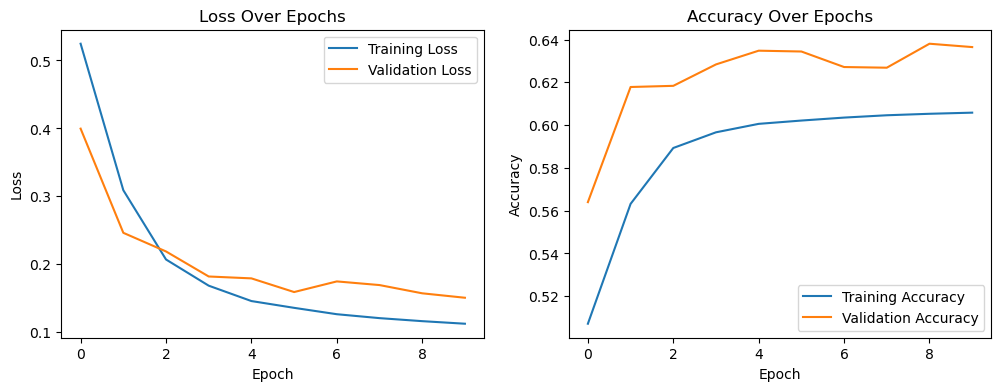

✅ Model saved to C:\Users\Naval Kishore\Desktop\vr_mini\Task_3_and_4\unet_model.h5


In [6]:
# Ask the user to enter a number
epch = int(input("Enter a epoch: "))  
batch_size= int(input("Enter a batch size: "))    
train_and_predict(batch_size , epch, 0.2)


## evaluating the segmented image

The code evaluates traditional segmentation by:

Calculating IoU (Intersection over Union) between ground truth and segmented masks.

Skipping missing images to avoid errors.

Displaying every 500th image with masks and IoU score.

Computing the average IoU for overall segmentation performance

Traditional segmentation evaluation started

Displaying Image 500: mask_000343_1.jpg


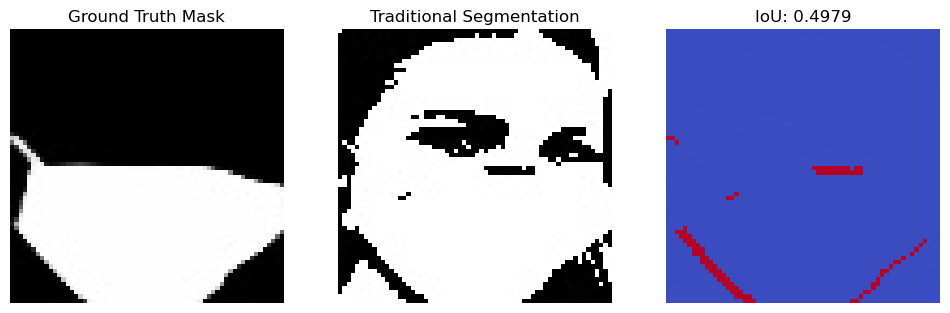


Displaying Image 1000: mask_000793_1.jpg


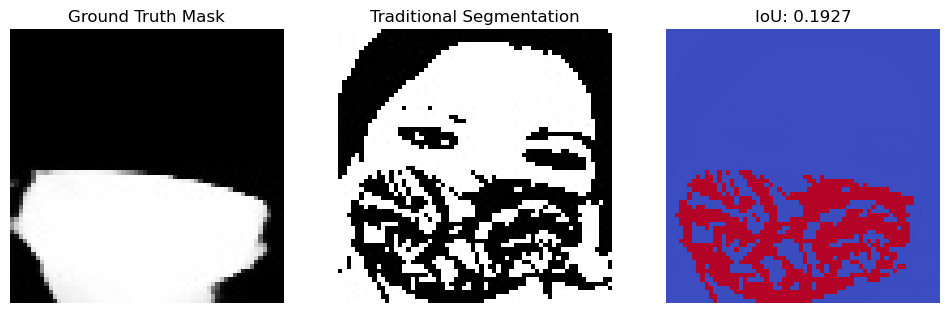


Displaying Image 1500: mask_001217_1.jpg


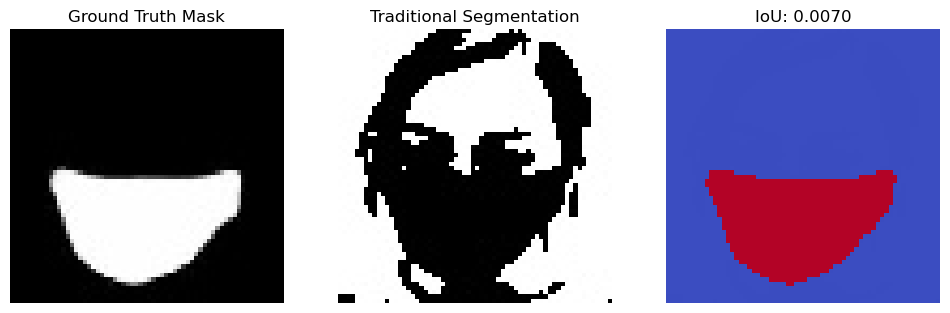


Displaying Image 2000: mask_001579_1.jpg


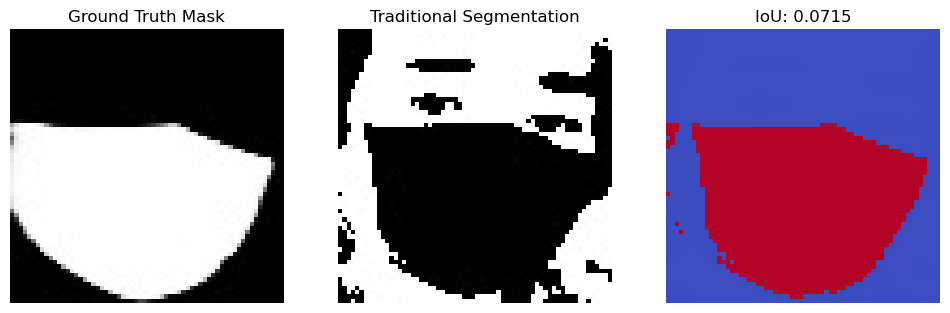


Displaying Image 2500: mask_002015_1.jpg


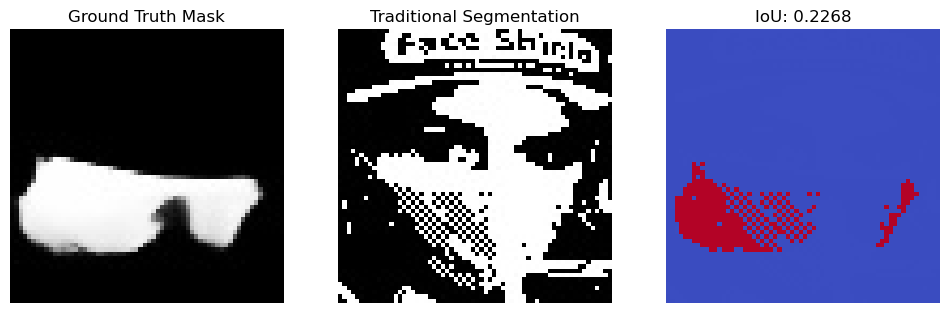


Displaying Image 3000: mask_002486_2.jpg


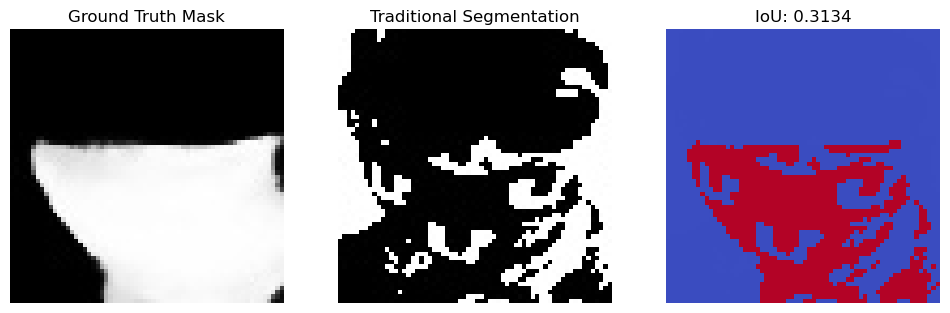


Displaying Image 3500: mask_002963_2.jpg


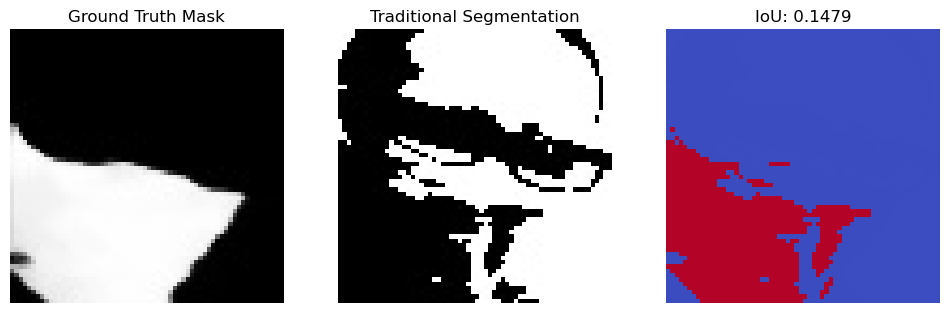


Displaying Image 4000: mask_003435_1.jpg


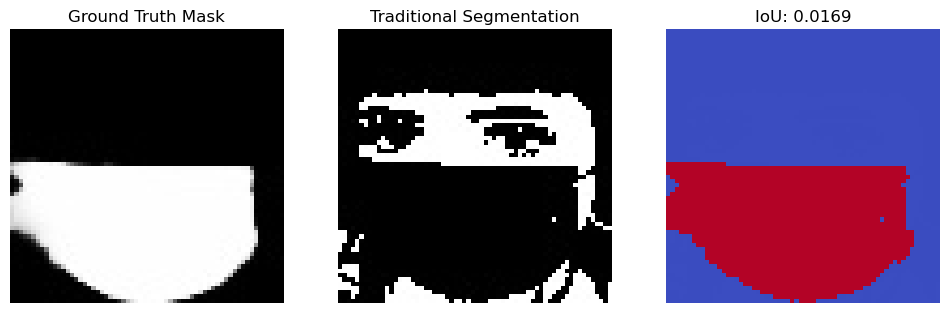


Displaying Image 4500: mask_003923_1.jpg


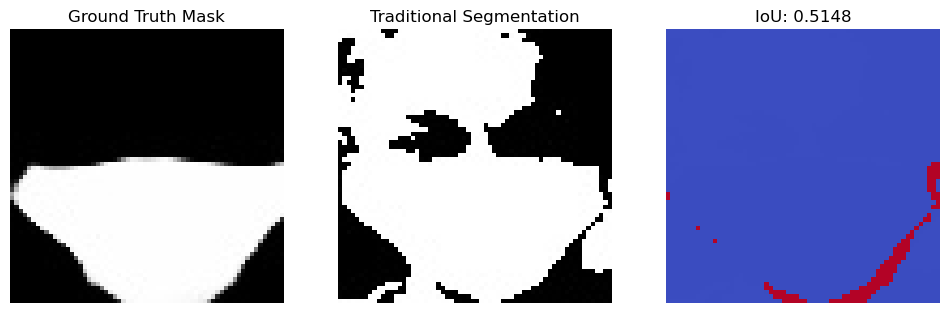


Displaying Image 5000: mask_004422_1.jpg


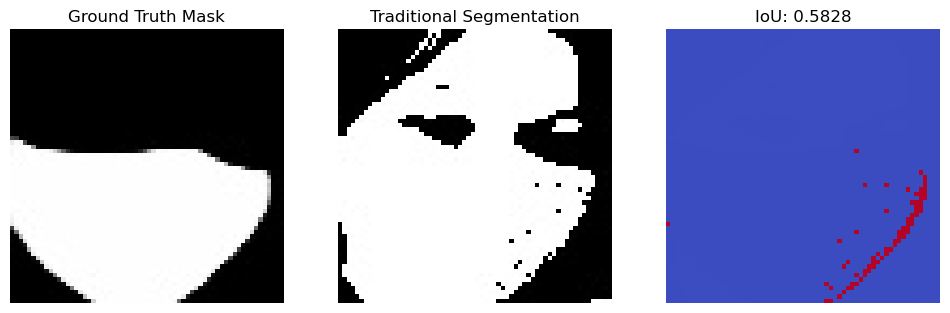


Displaying Image 5500: mask_004884_1.jpg


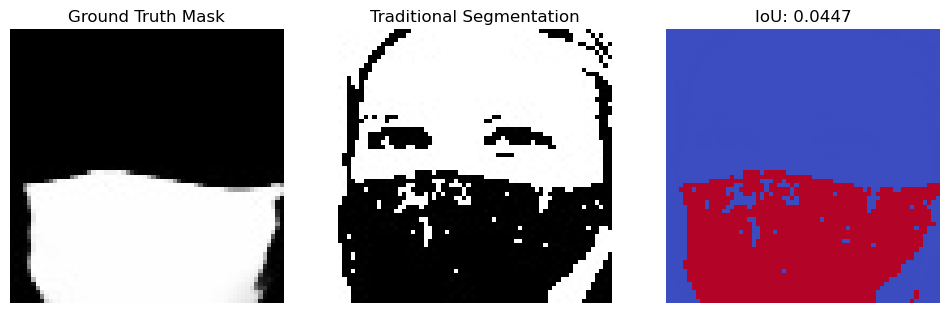


Displaying Image 6000: mask_005408_1.jpg


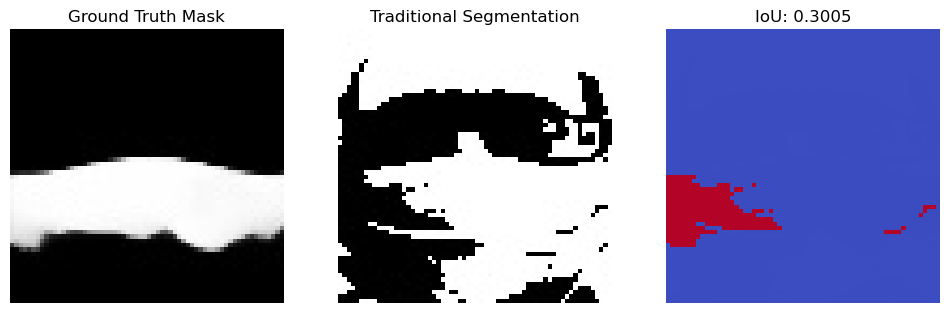


Displaying Image 6500: mask_005881_1.jpg


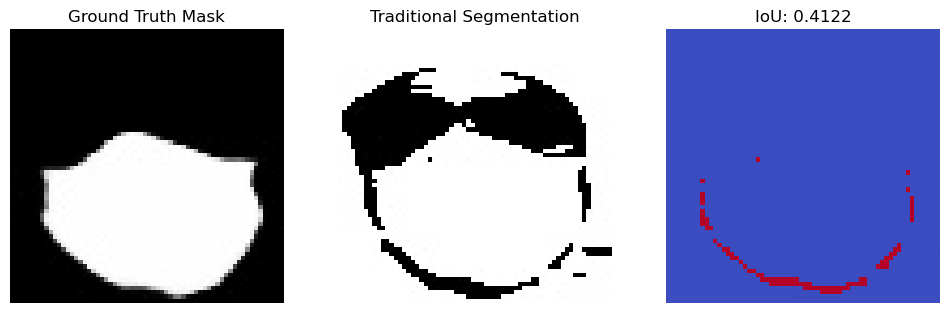


Displaying Image 7000: mask_006336_1.jpg


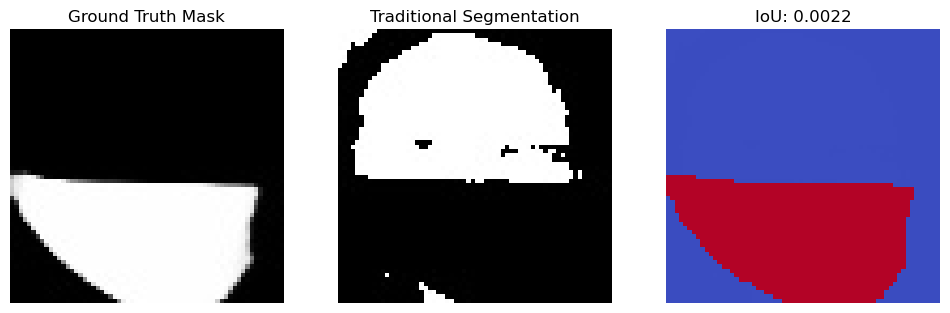


Displaying Image 7500: mask_006724_1.jpg


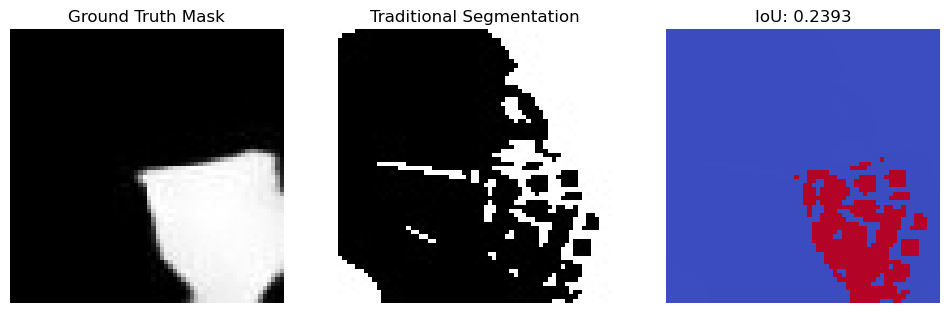


Displaying Image 8000: mask_007137_1.jpg


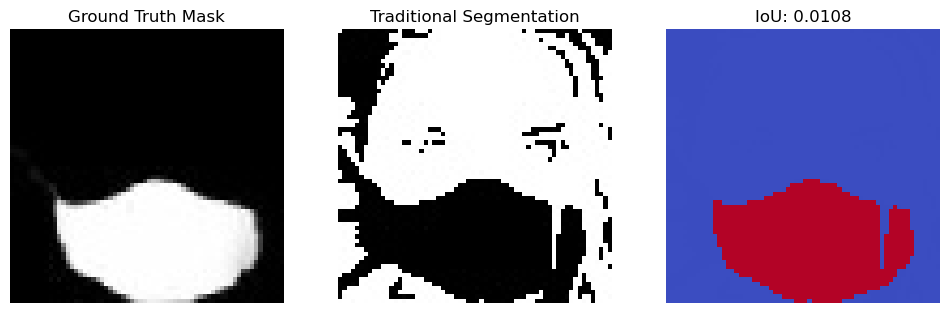


Displaying Image 8500: mask_007492_10.jpg


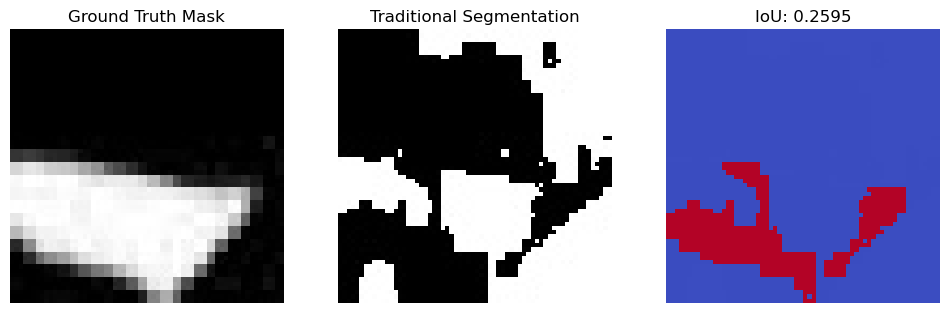


Displaying Image 9000: mask_007850_1.jpg


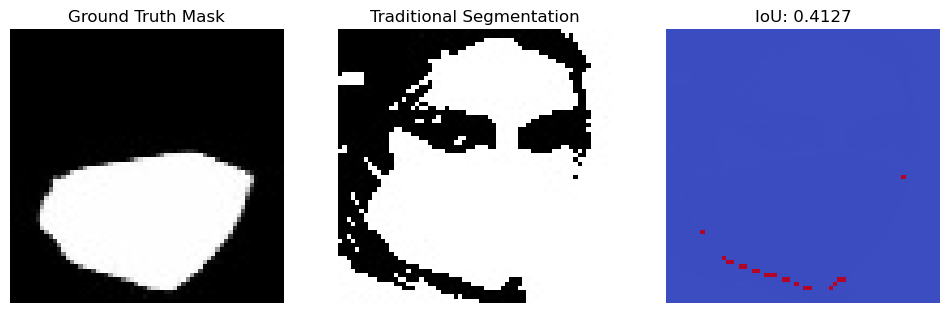

✅ Average IoU for Traditional Segmentation: 0.2747


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define directories
current_dir = os.getcwd()
ground_truth_dir = os.path.join(current_dir, "P_s_mask")  # Ground truth masks
traditional_segmented_dir = os.path.join(current_dir, "Traditional_Segmented")  # Traditional segmented masks

# Function to calculate IoU score
def calculate_iou(mask_true, mask_pred):
    mask_true = (mask_true > 127).astype(np.uint8)  # Convert to binary mask
    mask_pred = (mask_pred > 127).astype(np.uint8)

    intersection = np.sum(mask_true * mask_pred)
    union = np.sum(mask_true) + np.sum(mask_pred) - intersection

    if union == 0:
        return 1.0 if intersection == 0 else 0.0  # Avoid division by zero

    return intersection / union

# Function to evaluate segmentation results
def evaluate_segmentation(ground_truth_dir, segmented_dir):
    print("Traditional segmentation evaluation started")
    iou_scores = []
    image_files = os.listdir(ground_truth_dir)
    
    # Add an index counter for image numbering
    for idx, filename in enumerate(image_files, start=1):  # Start counting from 1
        if filename.startswith("mask_") and filename.endswith((".jpg", ".png")):
            ground_truth_path = os.path.join(ground_truth_dir, filename)
            base_filename = filename.replace("mask_", "gray_")  # Convert mask_ to gray_
            segmented_path = os.path.join(segmented_dir, f"seg_{base_filename}")

            # Load images
            ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
            segmented = cv2.imread(segmented_path, cv2.IMREAD_GRAYSCALE)

            if ground_truth is None or segmented is None:
                print(f"Skipping {filename}, image not found. Ground truth path: {ground_truth_path}, Segmented path: {segmented_path}")
                continue

            # Compute IoU
            iou = calculate_iou(ground_truth, segmented)
            iou_scores.append(iou)

            # Print one image out of every 500
            if idx % 500 == 0:
                print(f"\nDisplaying Image {idx}: {filename}")

                # Display results
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.imshow(ground_truth, cmap='gray')
                plt.title("Ground Truth Mask")
                plt.axis("off")

                plt.subplot(1, 3, 2)
                plt.imshow(segmented, cmap='gray')
                plt.title("Traditional Segmentation")
                plt.axis("off")

                plt.subplot(1, 3, 3)
                plt.imshow((ground_truth > 127).astype(np.uint8) * 255 - (segmented > 127).astype(np.uint8) * 255, cmap='coolwarm')
                plt.title(f"IoU: {iou:.4f}")
                plt.axis("off")

                plt.show()

    # Compute average IoU
    if iou_scores:
        avg_iou = np.mean(iou_scores)
        print(f"✅ Average IoU for Traditional Segmentation: {avg_iou:.4f}")
    else:
        print("❌ No valid segmentations found for evaluation.")

# Run evaluation
evaluate_segmentation(ground_truth_dir, traditional_segmented_dir)


## Evaluating the Unet


The code evaluates U-Net segmentation by:

Loading the trained U-Net model and processing preprocessed images.

Generating segmentation masks using the model.

Calculating IoU (Intersection over Union) scores against ground truth masks.

Displaying every 500th image with segmentation results.

Computing and printing the average IoU for performance evaluation. 

U-Net segmentation evaluation started
✅ Loaded U-Net model from C:\Users\Naval Kishore\Desktop\vr_mini\Task_3_and_4\unet_model.h5

Displaying Image 500: mask_000343_1.jpg


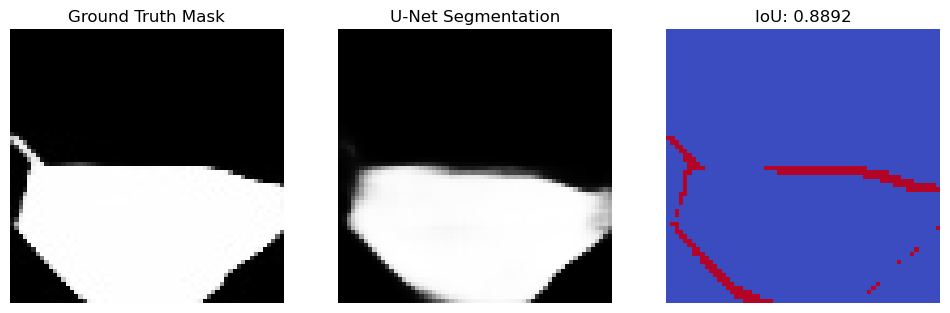


Displaying Image 1000: mask_000793_1.jpg


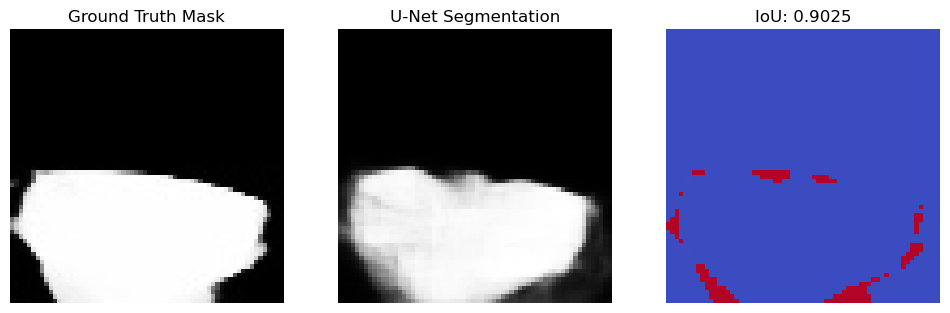


Displaying Image 1500: mask_001217_1.jpg


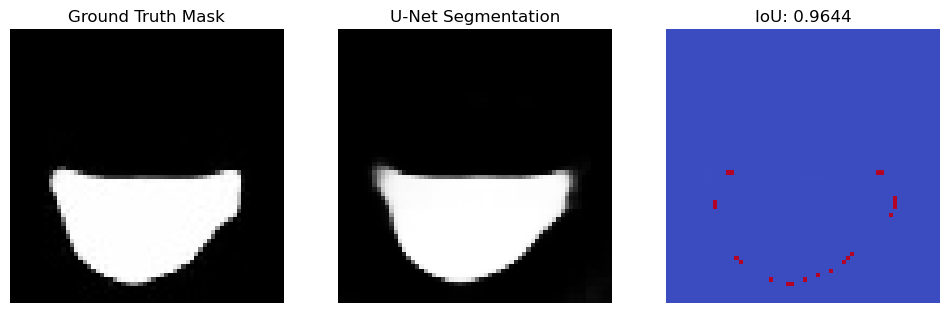


Displaying Image 2000: mask_001579_1.jpg


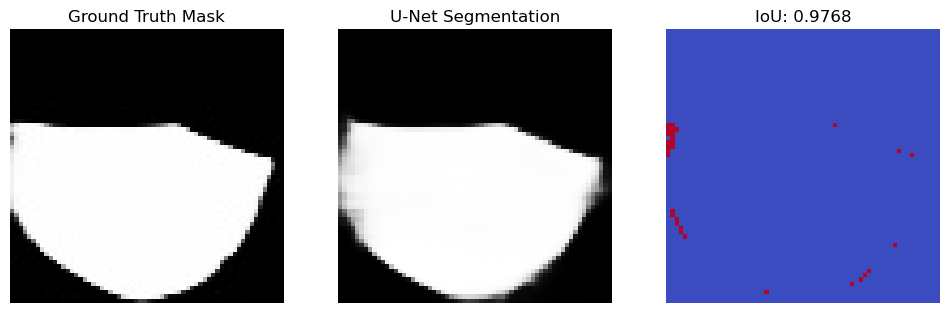


Displaying Image 2500: mask_002015_1.jpg


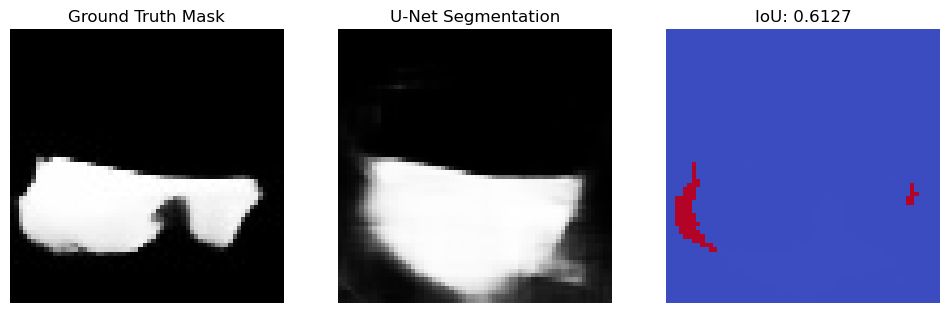


Displaying Image 3000: mask_002486_2.jpg


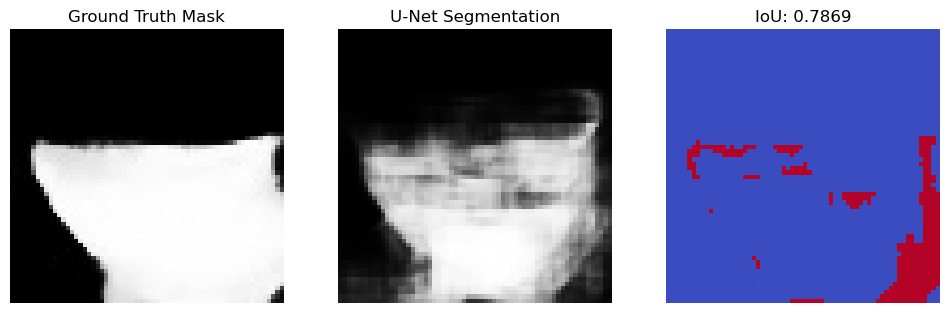


Displaying Image 3500: mask_002963_2.jpg


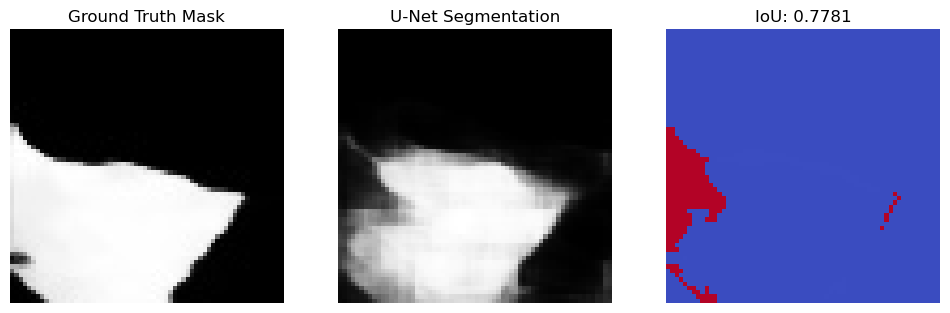


Displaying Image 4000: mask_003435_1.jpg


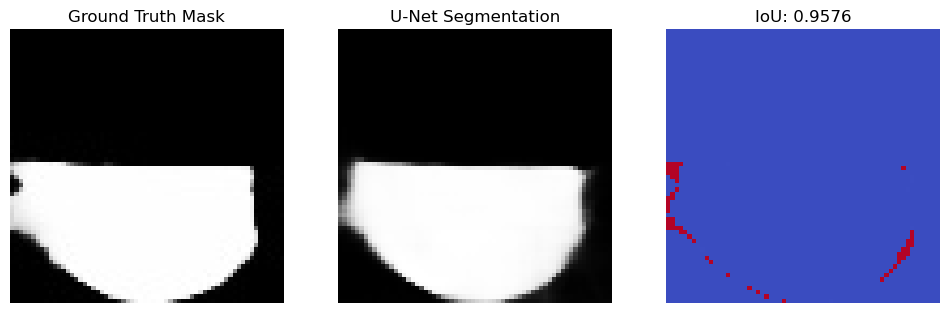


Displaying Image 4500: mask_003923_1.jpg


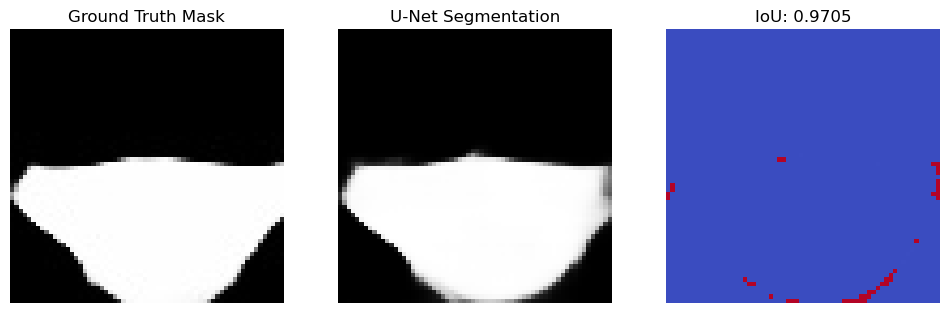


Displaying Image 5000: mask_004422_1.jpg


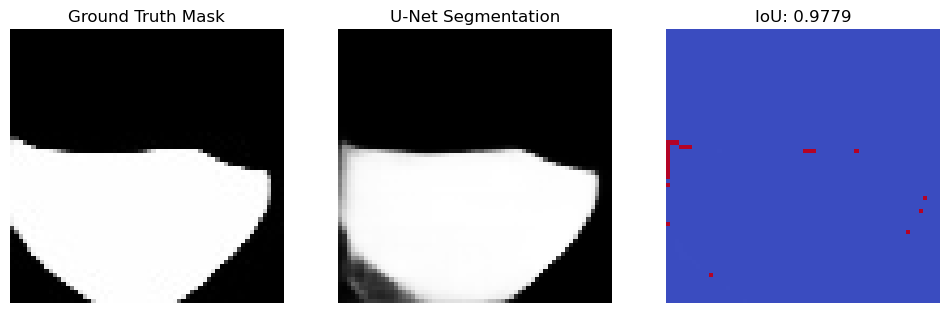


Displaying Image 5500: mask_004884_1.jpg


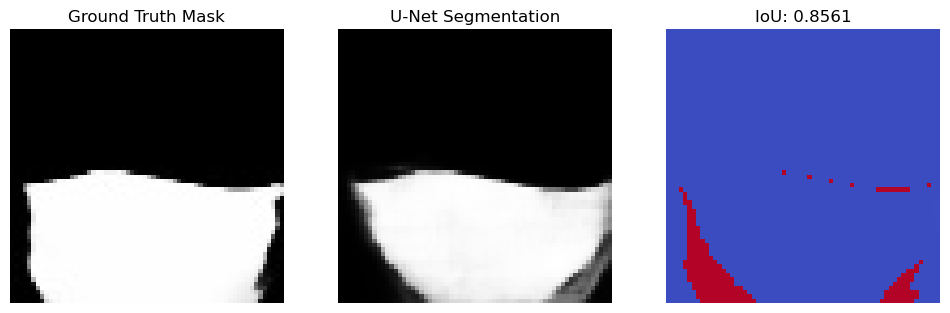


Displaying Image 6000: mask_005408_1.jpg


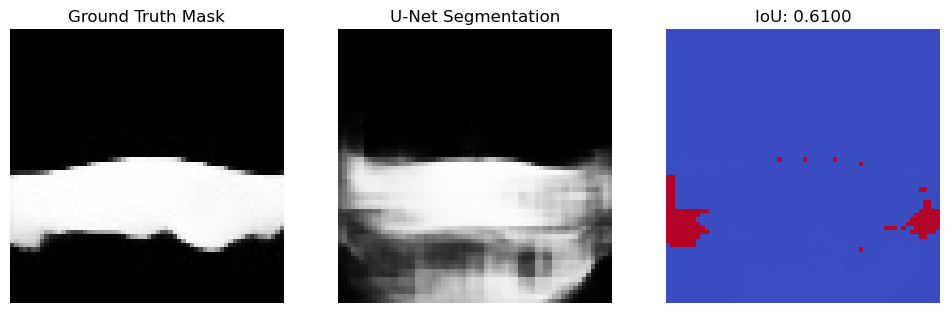


Displaying Image 6500: mask_005881_1.jpg


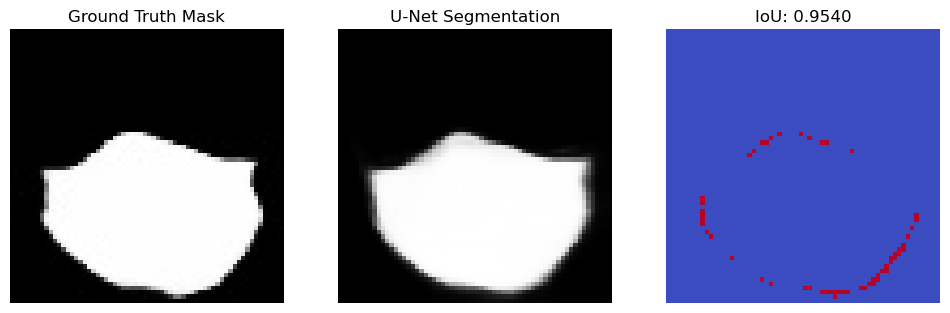


Displaying Image 7000: mask_006336_1.jpg


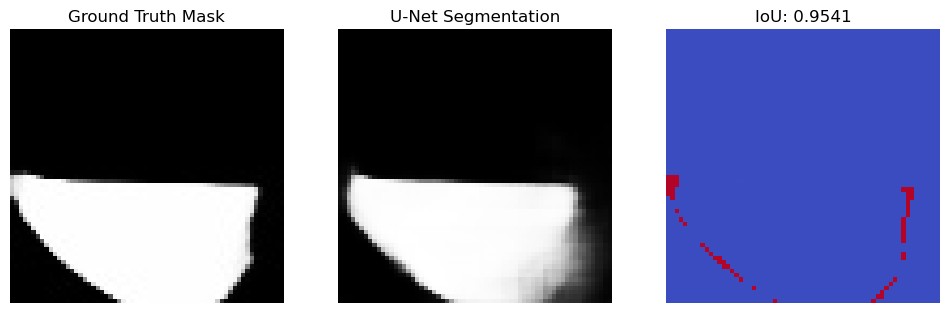


Displaying Image 7500: mask_006724_1.jpg


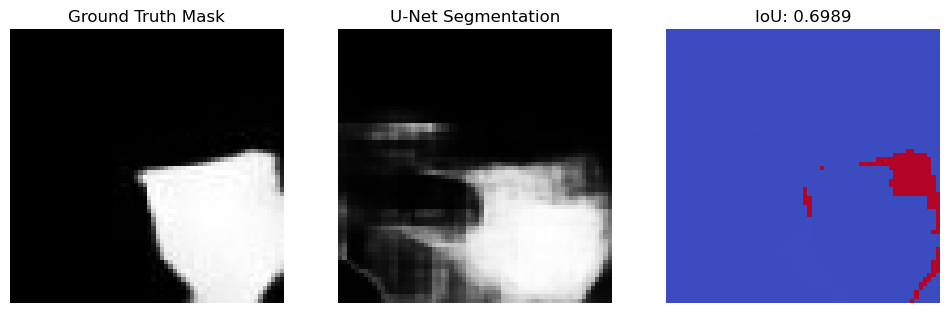


Displaying Image 8000: mask_007137_1.jpg


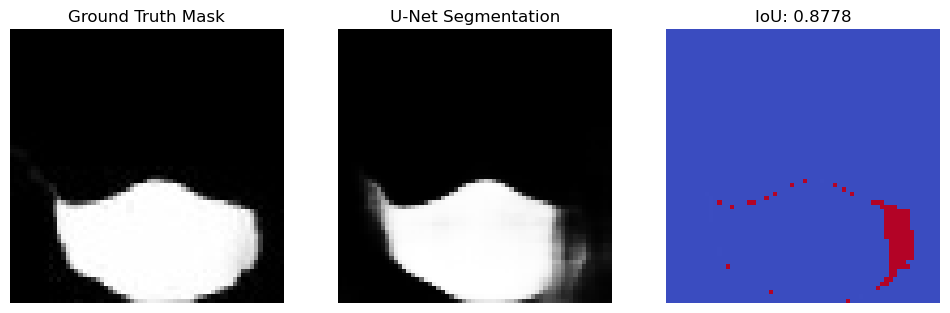


Displaying Image 8500: mask_007492_10.jpg


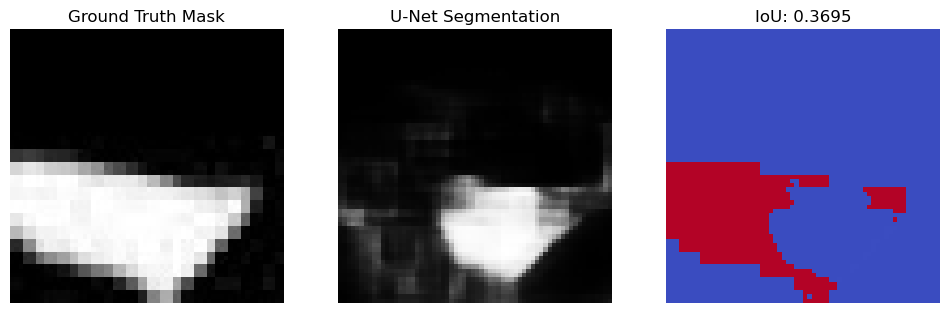


Displaying Image 9000: mask_007850_1.jpg


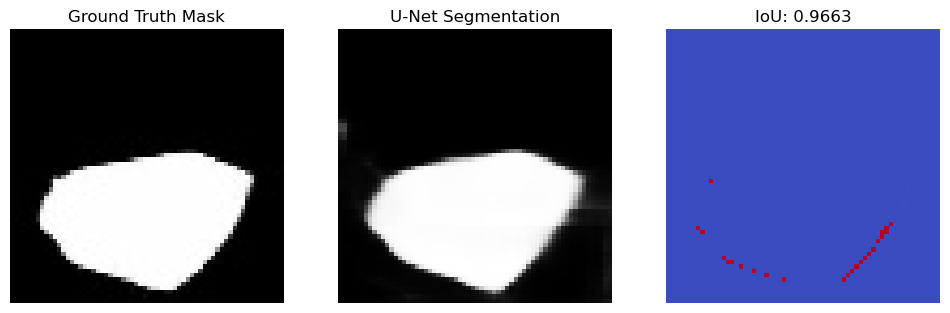

✅ Average IoU for U-Net Segmentation: 0.8762


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define directories
current_dir = os.getcwd()
ground_truth_dir = os.path.join(current_dir, "P_s_mask")  # Ground truth masks
preprocessed_images_dir = os.path.join(current_dir, "P_mask")  # Preprocessed grayscale images
unet_model_path = os.path.join(current_dir, "unet_model.h5")  # Path to saved U-Net model

# Function to calculate IoU score
def calculate_iou(mask_true, mask_pred):
    mask_true = (mask_true > 127).astype(np.uint8)  # Convert to binary mask
    mask_pred = (mask_pred > 127).astype(np.uint8)

    intersection = np.sum(mask_true * mask_pred)
    union = np.sum(mask_true) + np.sum(mask_pred) - intersection

    if union == 0:
        return 1.0 if intersection == 0 else 0.0  # Avoid division by zero

    return intersection / union

# Function to evaluate U-Net segmentation results
def evaluate_unet_segmentation(ground_truth_dir, preprocessed_images_dir, model_path):
    print("U-Net segmentation evaluation started")
    
    # Load the saved U-Net model
    try:
        model = tf.keras.models.load_model(model_path)
        print(f"✅ Loaded U-Net model from {model_path}")
    except Exception as e:
        print(f"❌ Failed to load U-Net model: {str(e)}")
        return

    iou_scores = []
    image_files = os.listdir(ground_truth_dir)

    # Add an index counter for image numbering
    for idx, filename in enumerate(image_files, start=1):  # Start counting from 1
        if filename.startswith("mask_") and filename.endswith((".jpg", ".png")):
            ground_truth_path = os.path.join(ground_truth_dir, filename)
            # Corresponding preprocessed image for prediction
            input_image_path = os.path.join(preprocessed_images_dir, filename.replace("mask_", "gray_"))

            # Load ground truth and input image
            ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
            input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            if ground_truth is None or input_image is None:
                print(f"Skipping {filename}, image not found. Ground truth path: {ground_truth_path}, Input image path: {input_image_path}")
                continue

            # Prepare input for U-Net (normalize and add batch/channel dimensions)
            input_image = input_image / 255.0  # Normalize to [0, 1]
            input_image = np.expand_dims(input_image, axis=(0, -1))  # Shape: (1, 64, 64, 1)

            # Predict using U-Net
            unet_pred = model.predict(input_image, verbose=0)  # Shape: (1, 64, 64, 1)
            unet_pred = unet_pred[0]  # Remove batch dimension: (64, 64, 1)
            unet_pred = (unet_pred * 255).astype(np.uint8)  # Scale back to [0, 255]
            unet_pred = unet_pred.squeeze()  # Remove channel dimension: (64, 64)

            # Resize to ensure same dimensions (should already be 64x64, but just in case)
            unet_pred = cv2.resize(unet_pred, (ground_truth.shape[1], ground_truth.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Compute IoU
            iou = calculate_iou(ground_truth, unet_pred)
            iou_scores.append(iou)

            # Print and display only one out of every 500 images
            if idx % 500 == 0:
                print(f"\nDisplaying Image {idx}: {filename}")

                # Display results
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.imshow(ground_truth, cmap='gray')
                plt.title("Ground Truth Mask")
                plt.axis("off")

                plt.subplot(1, 3, 2)
                plt.imshow(unet_pred, cmap='gray')
                plt.title("U-Net Segmentation")
                plt.axis("off")

                plt.subplot(1, 3, 3)
                plt.imshow((ground_truth > 127).astype(np.uint8) * 255 - (unet_pred > 127).astype(np.uint8) * 255, cmap='coolwarm')
                plt.title(f"IoU: {iou:.4f}")
                plt.axis("off")

                plt.show()

    # Compute average IoU
    if iou_scores:
        avg_iou = np.mean(iou_scores)
        print(f"✅ Average IoU for U-Net Segmentation: {avg_iou:.4f}")
    else:
        print("❌ No valid segmentations found for evaluation.")

# Run evaluation
evaluate_unet_segmentation(ground_truth_dir, preprocessed_images_dir, unet_model_path)


## Compare tradional segmentation and Unet 

The code compares traditional segmentation vs. U-Net segmentation by:

Randomly selecting 5 images for evaluation.

Loading and processing images, including ground truth, traditional segmentation, and U-Net predictions.

Computing IoU scores for both methods.

Displaying side-by-side visual comparisons of original, segmented, and IoU difference maps.

Calculating and printing average IoU for both approaches

Comaprison Tradional segmentaion and Unet started


✅ Loaded U-Net model from C:\Users\Naval Kishore\Desktop\vr_mini\Task_3_and_4\unet_model.h5
Selected 5 random images for comparison: ['mask_001597_1.jpg', 'mask_004231_1.jpg', 'mask_001606_1.jpg', 'mask_004660_1.jpg', 'mask_007652_1.jpg']

Image 1: mask_001597_1.jpg


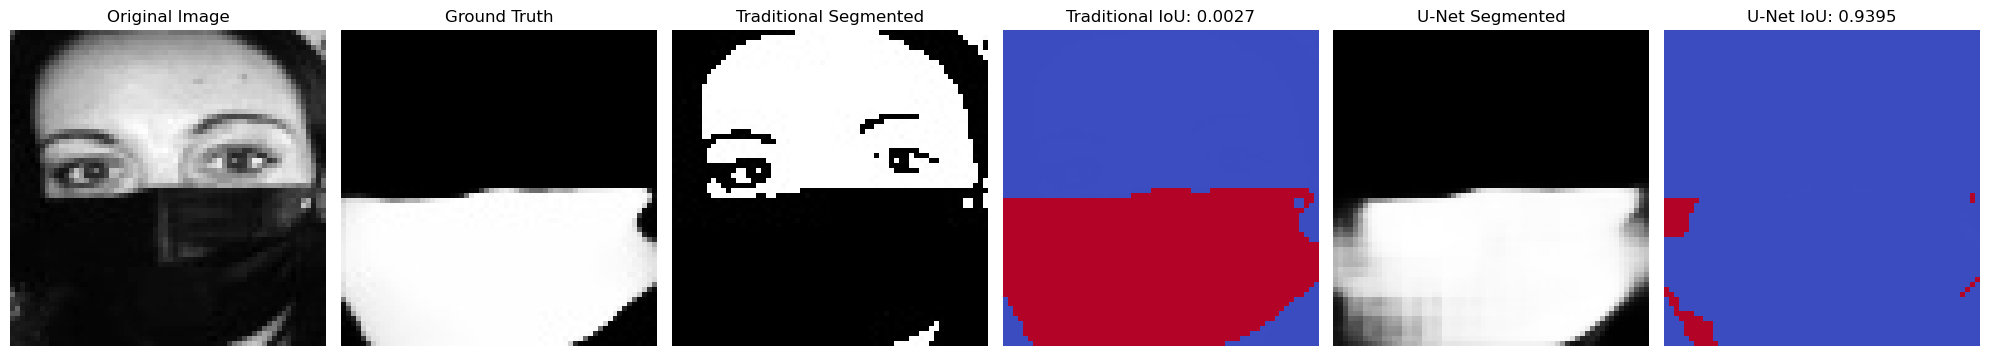


Image 2: mask_004231_1.jpg


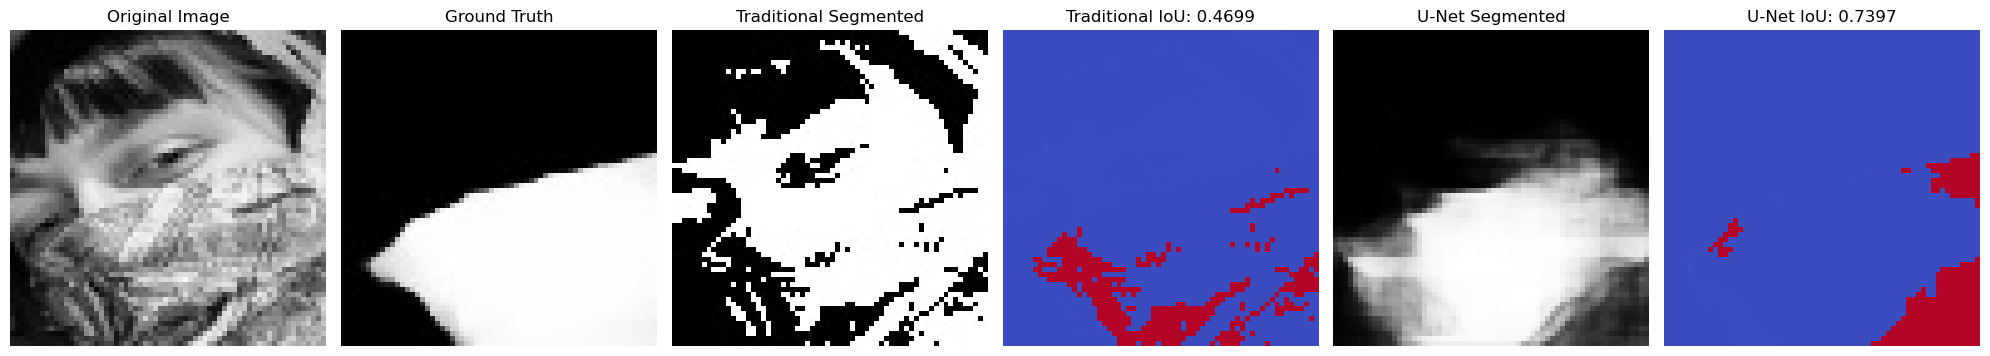


Image 3: mask_001606_1.jpg


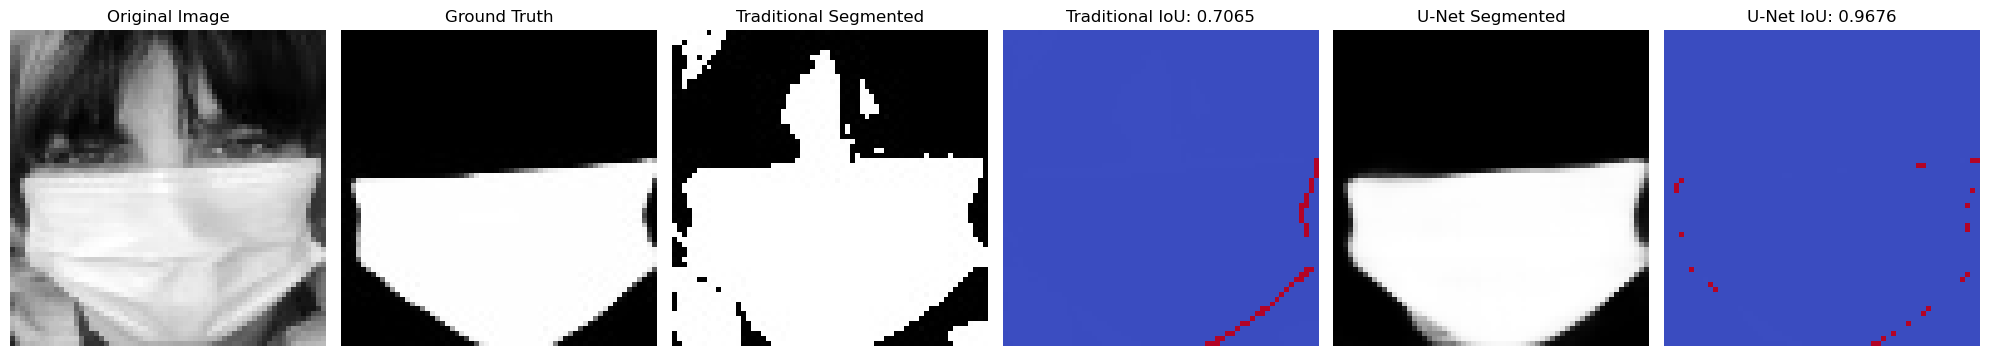


Image 4: mask_004660_1.jpg


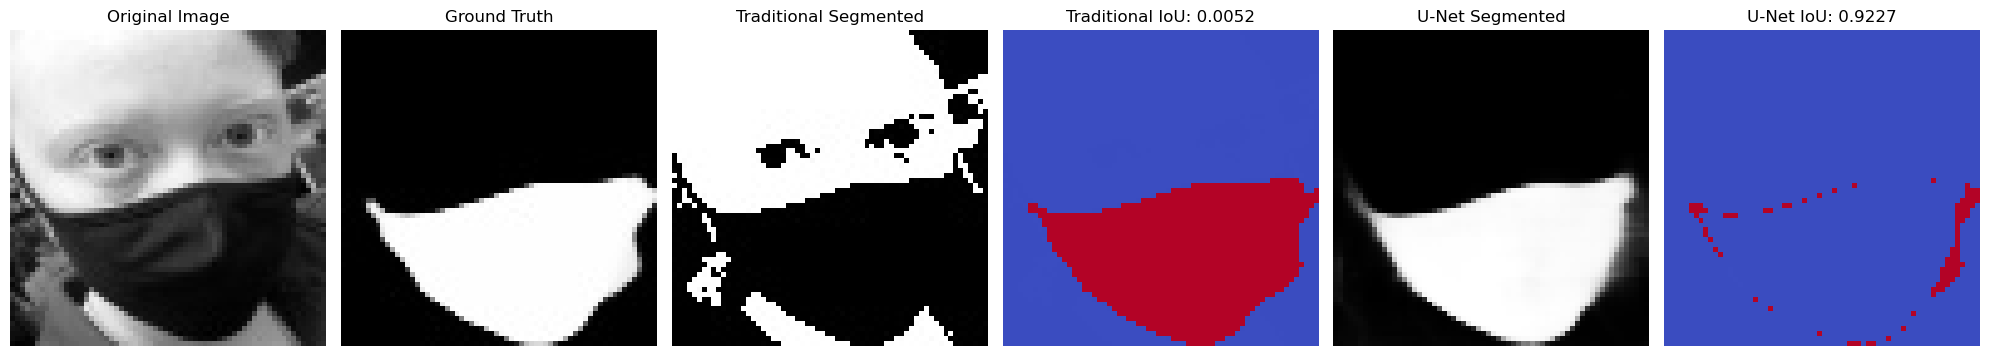


Image 5: mask_007652_1.jpg


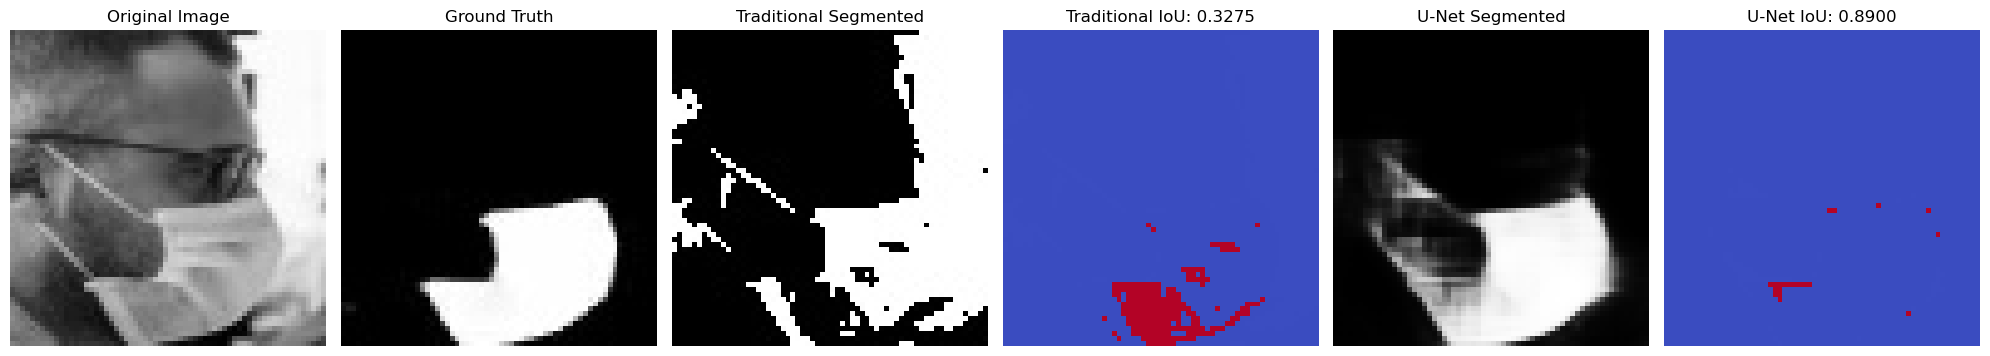

✅ Average IoU for Traditional Segmentation (over 5 images): 0.3024
✅ Average IoU for U-Net Segmentation (over 5 images): 0.8919
Difference (U-Net - Traditional): 0.5895


In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

# Define directories
current_dir = os.getcwd()
preprocessed_images_dir = os.path.join(current_dir, "P_mask")  # Preprocessed grayscale images
ground_truth_dir = os.path.join(current_dir, "P_s_mask")  # Ground truth masks
traditional_segmented_dir = os.path.join(current_dir, "Traditional_Segmented")  # Traditional segmented masks
unet_model_path = os.path.join(current_dir, "unet_model.h5")  # Path to saved U-Net model

# Function to calculate IoU score
def calculate_iou(mask_true, mask_pred):
    mask_true = (mask_true > 127).astype(np.uint8)  # Convert to binary mask
    mask_pred = (mask_pred > 127).astype(np.uint8)

    intersection = np.sum(mask_true * mask_pred)
    union = np.sum(mask_true) + np.sum(mask_pred) - intersection

    if union == 0:
        return 1.0 if intersection == 0 else 0.0  # Avoid division by zero

    return intersection / union

# Function to compare segmentation results for n random images
def compare_segmentation_results(preprocessed_images_dir, ground_truth_dir, traditional_segmented_dir, unet_model_path, n=5):
    print("Comaprison Tradional segmentaion and Unet started")
    # Load the saved U-Net model
    try:
        model = tf.keras.models.load_model(unet_model_path)
        print(f"✅ Loaded U-Net model from {unet_model_path}")
    except Exception as e:
        print(f"❌ Failed to load U-Net model: {str(e)}")
        return

    # Get list of ground truth files
    image_files = [f for f in os.listdir(ground_truth_dir) if f.startswith("mask_") and f.endswith((".jpg", ".png"))]
    if len(image_files) < n:
        print(f"❌ Not enough images to select {n}. Found only {len(image_files)} images.")
        return

    # Randomly select n images
    selected_files = random.sample(image_files, n)
    print(f"Selected {n} random images for comparison: {selected_files}")

    traditional_iou_scores = []
    unet_iou_scores = []

    # Add an index counter for image numbering
    for idx, filename in enumerate(selected_files, start=1):  # Start counting from 1
        # Define file paths
        ground_truth_path = os.path.join(ground_truth_dir, filename)
        input_image_path = os.path.join(preprocessed_images_dir, filename.replace("mask_", "gray_"))
        traditional_seg_path = os.path.join(traditional_segmented_dir, f"seg_{filename.replace('mask_', 'gray_')}")

        # Load images
        ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
        input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
        traditional_seg = cv2.imread(traditional_seg_path, cv2.IMREAD_GRAYSCALE)

        if ground_truth is None or input_image is None or traditional_seg is None:
            print(f"Skipping {filename}, one or more images not found.")
            print(f"Ground truth path: {ground_truth_path}")
            print(f"Input image path: {input_image_path}")
            print(f"Traditional segmented path: {traditional_seg_path}")
            continue

        # Prepare input for U-Net and predict
        unet_input = input_image / 255.0  # Normalize to [0, 1]
        unet_input = np.expand_dims(unet_input, axis=(0, -1))  # Shape: (1, 64, 64, 1)
        unet_pred = model.predict(unet_input, verbose=0)  # Shape: (1, 64, 64, 1)
        unet_pred = unet_pred[0]  # Remove batch dimension: (64, 64, 1)
        unet_pred = (unet_pred * 255).astype(np.uint8)  # Scale back to [0, 255]
        unet_pred = unet_pred.squeeze()  # Remove channel dimension: (64, 64)

        # Ensure all images have the same dimensions
        traditional_seg = cv2.resize(traditional_seg, (ground_truth.shape[1], ground_truth.shape[0]), interpolation=cv2.INTER_NEAREST)
        unet_pred = cv2.resize(unet_pred, (ground_truth.shape[1], ground_truth.shape[0]), interpolation=cv2.INTER_NEAREST)

        # Compute IoU scores
        traditional_iou = calculate_iou(ground_truth, traditional_seg)
        unet_iou = calculate_iou(ground_truth, unet_pred)
        traditional_iou_scores.append(traditional_iou)
        unet_iou_scores.append(unet_iou)

        # Print image number before displaying the images
        print(f"\nImage {idx}: {filename}")

        # Display results
        plt.figure(figsize=(20, 4))
        
        # Original Image
        plt.subplot(1, 6, 1)
        plt.imshow(input_image, cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        # Ground Truth
        plt.subplot(1, 6, 2)
        plt.imshow(ground_truth, cmap='gray')
        plt.title("Ground Truth")
        plt.axis("off")

        # Traditional Segmented
        plt.subplot(1, 6, 3)
        plt.imshow(traditional_seg, cmap='gray')
        plt.title("Traditional Segmented")
        plt.axis("off")

        # Traditional IoU Difference Map
        plt.subplot(1, 6, 4)
        plt.imshow((ground_truth > 127).astype(np.uint8) * 255 - (traditional_seg > 127).astype(np.uint8) * 255, cmap='coolwarm')
        plt.title(f"Traditional IoU: {traditional_iou:.4f}")
        plt.axis("off")

        # U-Net Segmented
        plt.subplot(1, 6, 5)
        plt.imshow(unet_pred, cmap='gray')
        plt.title("U-Net Segmented")
        plt.axis("off")

        # U-Net IoU Difference Map
        plt.subplot(1, 6, 6)
        plt.imshow((ground_truth > 127).astype(np.uint8) * 255 - (unet_pred > 127).astype(np.uint8) * 255, cmap='coolwarm')
        plt.title(f"U-Net IoU: {unet_iou:.4f}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    # Compute and print average IoU scores
    if traditional_iou_scores and unet_iou_scores:
        avg_traditional_iou = np.mean(traditional_iou_scores)
        avg_unet_iou = np.mean(unet_iou_scores)
        print(f"✅ Average IoU for Traditional Segmentation (over {len(traditional_iou_scores)} images): {avg_traditional_iou:.4f}")
        print(f"✅ Average IoU for U-Net Segmentation (over {len(unet_iou_scores)} images): {avg_unet_iou:.4f}")
        print(f"Difference (U-Net - Traditional): {avg_unet_iou - avg_traditional_iou:.4f}")
    else:
        print("❌ No valid comparisons were made.")

# Run comparison for 5 random images
compare_segmentation_results(preprocessed_images_dir, ground_truth_dir, traditional_segmented_dir, unet_model_path, n=5)